In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#df = pd.read_csv("http://nucsmb/ensemble/income_small0.csv")
df = pd.read_csv("http://nucsmb/synthetic_income.csv")
df.head(2)

,City,State,Occupation,Income
0,Denver,MA,Electrician,67369.30
1,Chicago,TX,Electrician,65342.25


In [4]:
#Xprime = df.drop(columns=['Name', 'Income'])    #obtain useful features. Name has no predictive value, Income is a label
Xprime = df.drop('Income', axis=1)    #get features
y = df['Income']                    #obtain target variable

In [6]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
Xnp = encoder.fit_transform(Xprime)
new_column_names = encoder.get_feature_names_out()
X = pd.DataFrame(Xnp, columns=new_column_names)
X.head()

,City_Atlanta,City_Boston,City_Chicago,City_Denver,City_Houston,City_Seattle,State_CO,State_GA,State_IL,State_MA,State_TX,State_WA,Occupation_Data Analyst,Occupation_Electrician,Occupation_Marketing Manager,Occupation_Nurse,Occupation_Software Engineer,Occupation_Teacher
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
inference_data = pd.DataFrame({
    'City': ['Seattle'],
    'State': ['WA'],
    'Occupation': ['Nurse']
})

inference_encoded = encoder.transform(inference_data)
inference_column_names = encoder.get_feature_names_out()
inference_df = pd.DataFrame(inference_encoded, columns=inference_column_names)
prediction = model.predict(inference_df)
print(prediction)

[79072.4908454]


In [10]:
coef_df = pd.DataFrame({
    'Feature': encoder.get_feature_names_out(),
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                         Feature   Coefficient
16  Occupation_Software Engineer  21843.814968
14  Occupation_Marketing Manager   7314.979825
5                   City_Seattle   4395.963055
1                    City_Boston   4379.025628
12       Occupation_Data Analyst   2594.399774
9                       State_MA   1590.750829
11                      State_WA    876.374014
6                       State_CO    424.172106
3                    City_Denver   -134.055881
7                       State_GA   -318.005180
10                      State_TX   -690.338448
0                   City_Atlanta   -742.046185
8                       State_IL  -1882.953321
4                   City_Houston  -2212.340874
15              Occupation_Nurse  -2723.735598
2                   City_Chicago  -5686.545743
13        Occupation_Electrician -12817.852534
17            Occupation_Teacher -16211.606434


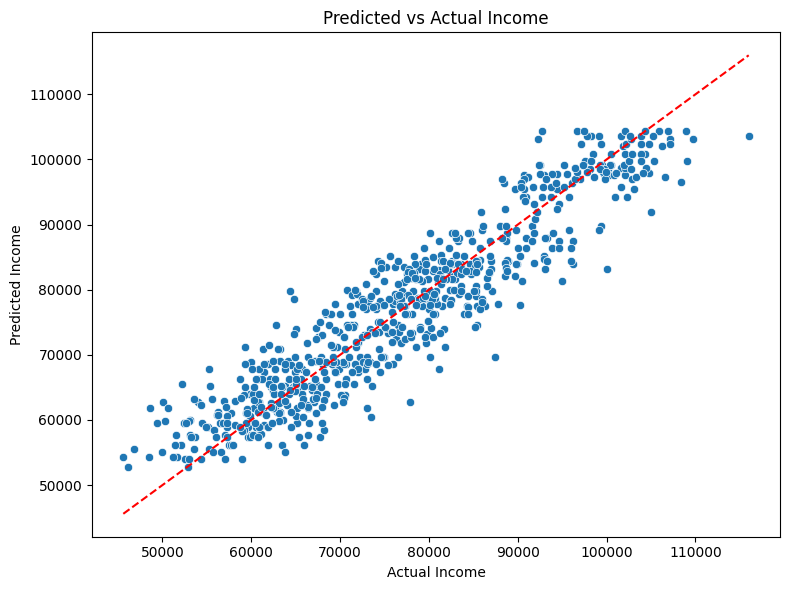

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=model.predict(X_train))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # ideal line
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Predicted vs Actual Income')
plt.tight_layout()
plt.show()


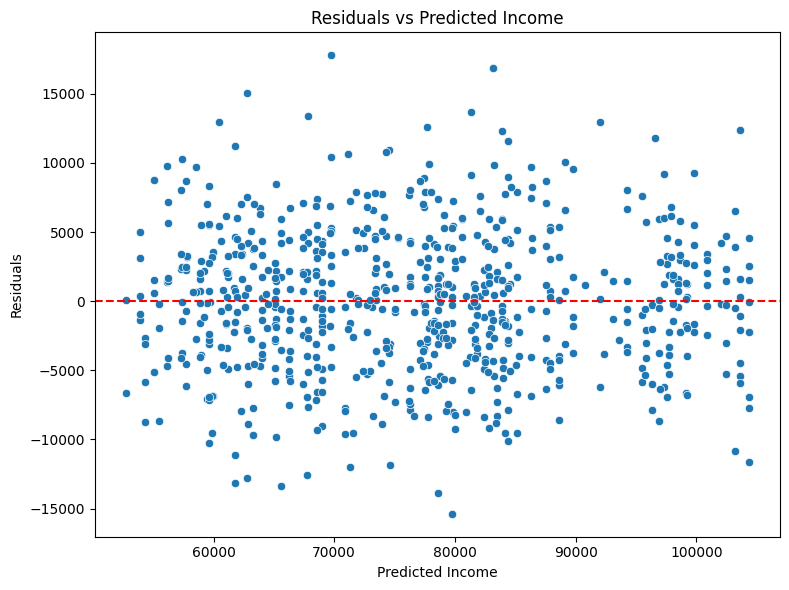

In [12]:
residuals = y_train - model.predict(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(X_train), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Income')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Income')
plt.tight_layout()
plt.show()


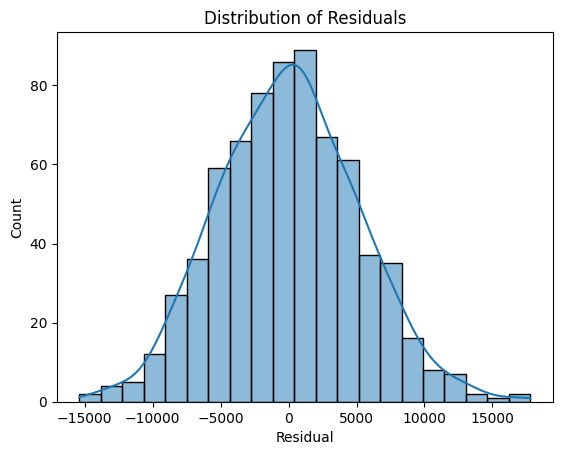

In [13]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_train, model.predict(X_train))
mae = mean_absolute_error(y_train, model.predict(X_train))
mse = mean_squared_error(y_train, model.predict(X_train))

print(f"R²: {r2:.2f}, MAE: {mae:.2f}, MSE: {mse:.2f}")


R²: 0.87, MAE: 4095.37, MSE: 26549098.53
